## Observations
1. Looking at box plot of Final Tumor Volume vs. Drug Regimen, median value of final tumor volume (mm3) is significantly smaller for drug Capomulin and Ramicane compared to Infubinol and Ceftamin. Excluding outlier of Infubinol, both Infubinol and Ceftamin median tumor volume is around 60 mm3 while both Capomulin and Ramicane median tumor volume is 38 mm3. From this boxplot, it is suspected Capomulin and Ramicane are more successful at decreasing tumor size compared to other two drugs. 

2. Looking at Line plot for Tumor volume of mouse I509 for each Timepoint, tumor volume initally increased from day 0 to day 20 even with treatment of Capomulin. However, tumor volume decreased drastically from Day 20 to Dat 45, dropping from 48 mm3 to 41 mm3 in 25 days. From this graph, it shows effectiveness of Capomulin treatment. 

3. Correlation and Regression plot shows that there is strong positive correlation between average tumor volume (mm3) and weight of mice. Correlation is 0.84, which indicates strong positive relationship. From this regression line, I can predict heavier mice will generally have larger tumor volume. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mouse = study_data_complete[study_data_complete.duplicated()]
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated = []
mouse_duplicate = pd.concat(x for duplicate, x in study_data_complete.groupby(['Mouse ID', 
                                                                              'Timepoint']) if len(x) > 1)
mouse_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_cleaned = study_data_complete[(study_data_complete['Mouse ID'] != 'g989')]
study_data_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(study_data_cleaned['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_volume = study_data_cleaned.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median_volume = study_data_cleaned.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
var_volume = study_data_cleaned.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std_volume = study_data_cleaned.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem_volume = study_data_cleaned.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({'Mean Tumor Volume' : mean_volume, 
                              'Median Tumor Volume' : median_volume, 
                              'Tumor Volume Variance' : var_volume, 
                              'Tumor Volume Std. Var.' : std_volume, 
                              'Tumor Volume Std. Err.' : sem_volume})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Var.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_table = study_data_cleaned.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

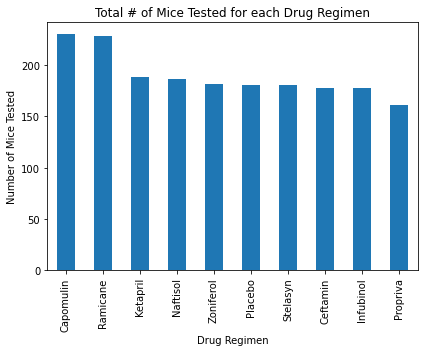

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_timepoints = study_data_complete.groupby(['Drug Regimen']).count()['Timepoint']
count_timepoints = count_timepoints.sort_values(ascending=False)
count_timepoints.plot(kind='bar', figsize=(6,5), title = "Total # of Mice Tested for each Drug Regimen",
                     ylabel='Number of Mice Tested')
plt.tight_layout()
plt.show()

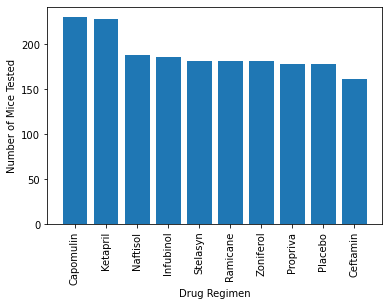

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
xAxis = study_data_cleaned['Drug Regimen'].unique()
tickLocations = []
for x in xAxis:
    tickLocations.append(x)
plt.bar(xAxis, count_timepoints, align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()

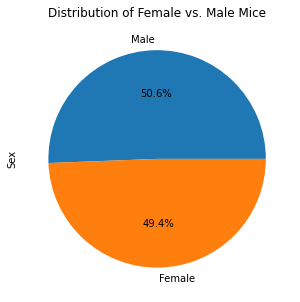

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_gender = study_data_complete.groupby(['Sex']).count()['Mouse ID']
count_gender = count_gender/count_gender.sum()
count_gender = count_gender.sort_values(ascending=False)
count_gender.plot(kind='pie', figsize=(6,5), title = "Distribution of Female vs. Male Mice",
                     ylabel='Sex', autopct = '%1.1f%%')

plt.show()

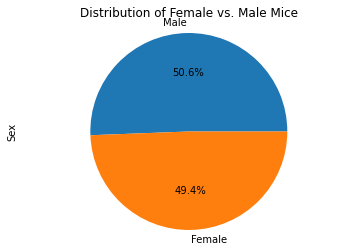

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count_gender, labels = ['Male', 'Female'], autopct = '%1.1f%%', startangle = 0)
plt.axis('equal')
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drug_data = study_data_complete.loc[(study_data_complete['Drug Regimen'] == 'Capomulin')|
                                    (study_data_complete['Drug Regimen'] == 'Ramicane')|
                                    (study_data_complete['Drug Regimen'] == 'Infubinol')|
                                    (study_data_complete['Drug Regimen'] == 'Ceftamin')]


# Start by getting the last (greatest) timepoint for each mouse
newDF = four_drug_data.groupby(["Mouse ID"])["Timepoint"].max()
newDF

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(newDF, four_drug_data, on=(["Mouse ID", "Timepoint"]))
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [64]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
outlier = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorDF = merged_data.loc[merged_data["Drug Regimen"] == drug]
    tumor_vol = tumorDF['Tumor Volume (mm3)'].reset_index()
    # add subset 
    tumor_vol_list.append(tumor_vol)
    
tumor_DF = pd.DataFrame({
    "Capomulin" : tumor_vol_list[0]['Tumor Volume (mm3)'],
    "Ramicane" : tumor_vol_list[1]['Tumor Volume (mm3)'],
    "Infubinol" : tumor_vol_list[2]['Tumor Volume (mm3)'],
    "Ceftamin" : tumor_vol_list[3]['Tumor Volume (mm3)'],
    })

for drug in treatment_list:
    quartiles = tumor_DF[drug].quantile([.25,.5,.75])
    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    IQR = upperQ-lowerQ
    
    # Determine outliers using upper and lower bounds
    lowerBound = lowerQ - (1.5*IQR)
    upperBound = upperQ + (1.5*IQR)
    outliers = tumor_DF.loc[(tumor_DF[drug] < lowerBound) | (tumor_DF[drug] > upperBound)]
    print(f"{drug}'s potential outliers : {outliers[drug]}")


Capomulin's potential outliers : Series([], Name: Capomulin, dtype: float64)
Ramicane's potential outliers : Series([], Name: Ramicane, dtype: float64)
Infubinol's potential outliers : 5    36.321346
Name: Infubinol, dtype: float64
Ceftamin's potential outliers : Series([], Name: Ceftamin, dtype: float64)


In [ ]:
for drug in treatment_list:
    quartiles = tumor_DF[drug].quantile([.25,.5,.75])
    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    IQR = upperQ-lowerQ

    # Determine outliers using upper and lower bounds
    lowerBound = lowerQ - (1.5*IQR)
    upperBound = upperQ + (1.5*IQR)
    
    outliers = tumor_DF.loc[(tumor_DF[drug] < lowerBound) | (tumor_DF[drug] > upperBound)]
    print(f"{drug}'s potential outliers : {outliers}")

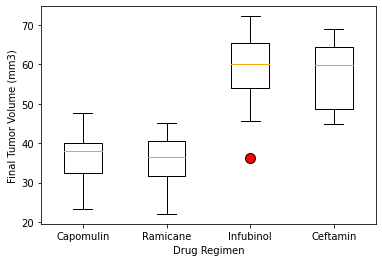

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
cap_data = study_data_complete.loc[(study_data_complete['Drug Regimen'] == 'Capomulin')]
cap_final_data = cap_data.loc[cap_data.groupby(['Mouse ID'])['Timepoint'].idxmax()]

ram_data = study_data_complete.loc[(study_data_complete['Drug Regimen'] == 'Ramicane')]
ram_final_data = ram_data.loc[ram_data.groupby(['Mouse ID'])['Timepoint'].idxmax()]

inf_data = study_data_complete.loc[(study_data_complete['Drug Regimen'] == 'Infubinol')]
inf_final_data = inf_data.loc[inf_data.groupby(['Mouse ID'])['Timepoint'].idxmax()]

cef_data = study_data_complete.loc[(study_data_complete['Drug Regimen'] == 'Ceftamin')]
cef_final_data = cef_data.loc[cef_data.groupby(['Mouse ID'])['Timepoint'].idxmax()]

boxplot_df = pd.DataFrame({'Capomulin' : cap_final_data['Tumor Volume (mm3)'],
                           'Ramicane' : ram_final_data['Tumor Volume (mm3)'],
                           'Infubinol' : inf_final_data['Tumor Volume (mm3)'], 
                           'Ceftamin' : cef_final_data['Tumor Volume (mm3)']})

boxplot_df.plot(kind='box', color=dict(boxes='black', whiskers='black', medians='orange', caps='black'),
               flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})

plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

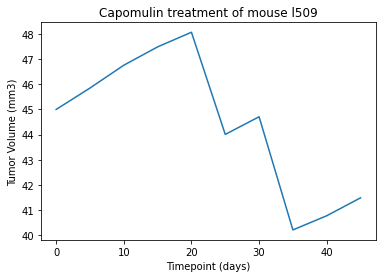

In [60]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
new_cap_data = study_data_complete.loc[(study_data_complete['Drug Regimen'] == 'Capomulin') & 
                                       (study_data_complete['Mouse ID'] == 'l509')]
xAxis = new_cap_data['Timepoint']
plt.plot(xAxis, new_cap_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

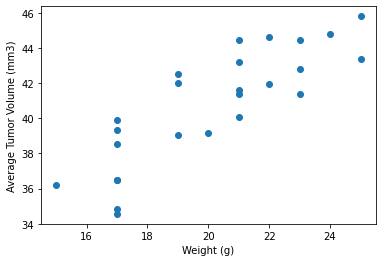

In [62]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
new_data = study_data_complete.loc[(study_data_complete['Drug Regimen'] == 'Capomulin')]
avg_tumor_vol = new_data.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
mouse_weight = new_data.groupby('Mouse ID').mean()['Weight (g)']

plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


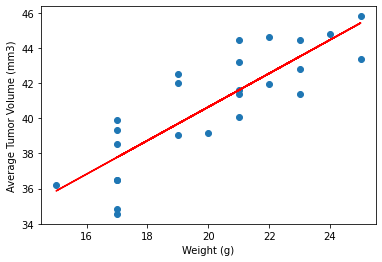

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import scipy.stats as st
from scipy import stats

corr = st.pearsonr(mouse_weight, avg_tumor_vol)
print(f'The correlation between mouse weight and the average tumor volume is {corr[0]:.2f}')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(mouse_weight, avg_tumor_vol)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(mouse_weight, avg_tumor_vol)
medicine_fit = (slope * mouse_weight) + intercept
plt.plot(mouse_weight, medicine_fit, "r-")

plt.show()
